# Nepal Education Data Analysis(2074BS)

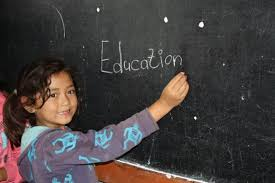

# Table of Content

1. Sex-Wise Student Enrollment of Higher Education by Province in 2074 BS
1. Grade-wise Student Enrollment of School Education in 2074 BS
1. Faculty-Wise Student Enrollment of Higher Education in 2074 BS
1. Level-Wise Student Enrollment of Higher Education in 2074 BS
1. Literacy Rate of 5 Years and Above by Province in 2011AD
1. Total Number of Teacher at Primary to Higher Secondary Level in all Types of Schools in 2074BS
1. University-Wise Student Enrollment of Higher Education by Sex in 2074 BS
1. Province-Wise Student Enrollment of Higher Education by Level in 2074 BS
1. Total Number of Universities and Campuses/Colleges by Province in 2074 BS
1. University-Wise Student Enrollment of Higher Education by Levels in 2074 BS
1. Faculty Wise Total Student Enrollment in Higher Education by Province in 2074 BS
1. Analysis of Teachers
1. Summary

In [ ]:
import numpy as np 
import pandas as pd 
import plotly.graph_objects as go

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objects as go
import plotly.express as px

import cufflinks as cf
cf.go_offline()

from plotly.subplots import make_subplots

* You can get data from : https://www.kaggle.com/milan400/education-in-figures-2017-at-a-glance
* Data is extracted from : https://moe.gov.np/assets/uploads/files/Educational_Brochure_2017.pdf

* This notebook contains Visualization gained from some of the data. The data maynot be in proper form. So, there is need to do preprocessing.

* A lot of insight of **Nepal Education System** can be gained from Visualization

# Sex-Wise Student Enrollment of Higher Education by Province in 2074 BS

In [ ]:
student_enrollment_sex = pd.read_csv('/kaggle/input/education-in-figures-2017-at-a-glance/data_csv_student/nepal_education_csv/Male_Female_CSV/Sex-Wise Student Enrollment of Higher Education by Province in 2074 BS.csv')
#student_enrollment_sex = student_enrollment_sex.dropna(axis=1)

#Extracting only Province, Male, Female Column
student_enrollment_sex = student_enrollment_sex.drop(columns = ['Total'])
student_enrollment_sex = student_enrollment_sex[student_enrollment_sex['Province'] !='Total']

student_enrollment_sex.iplot(x='Province', y=['Female','Male'], kind='bar', xTitle='Sex-Wise Student Enrollment of Higher Education by Province in 2074 BS', yTitle='No of Students')

**PieChart: Sex-Wise Student Enrollment of Higher Education by Province in 2074 BS**

In [ ]:
labels = student_enrollment_sex['Province'].tolist()

values1 = student_enrollment_sex['Male'].tolist()
values2 = student_enrollment_sex['Female'].tolist()


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values1, name="Male"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Female"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    autosize=True,
    width=800,
    title_text="Sex-Wise Student Enrollment of Higher Education by Province in 2074 BS",
    # Add annotations in the center of the donut pies.
    annotations=[
                 dict(text='Boys', x=0.2, y=0.5, font_size=13, showarrow=False),
                dict(text='Girls', x=0.8, y=0.5, font_size=13, showarrow=False)])
fig.show()

**Bubble Chart: Sex-Wise Student Enrollment of Higher Education by Province in 2074 BS**

In [ ]:
fig = px.scatter(student_enrollment_sex, x="Male", y="Female", size="Male", color="Province",
           hover_name="Province", log_x=True, size_max=60)
fig.show()

* Province 3 has the highest number of students enrollment
* Karnali has the lowest number of students enrollment

# Grade-wise Student Enrollment of School Education in 2074 BS

In [ ]:
grade_wise_student = pd.read_csv('/kaggle/input/education-in-figures-2017-at-a-glance/data_csv_student/nepal_education_csv/Male_Female_CSV/Grade-wise Student Enrollment of School Education in 2074 BS.csv')

grade_wise_student = grade_wise_student[['Grade','Gis','Boys','Total']]
grade_wise_student = grade_wise_student.rename(columns={'Gis':'Girls'})

#Removing the values of range
noise = ['Total Grade (1-8)',' 	Grades(6-8)','Grade (9-10)', 'Grade (11-12)','Grand Total (1-12)','Grades(1-5)','Grades(6-8)']
for n in noise:
    grade_wise_student = grade_wise_student[grade_wise_student.Grade != n]
grade_wise_student.iplot(x='Grade', y=['Girls','Boys'], kind='bar', xTitle='Grade-wise Student Enrollment of School Education in 2074 BS', yTitle='No of Students')

In [ ]:
grade_wise_student.iplot(x='Grade', y=['Girls','Boys'], kind='scatter', xTitle='Grade-wise Student Enrollment of School Education in 2074 BS',yTitle='No of Students')

**Pie Chart for Enrollment of Student**

In [ ]:
labels = grade_wise_student['Grade'].tolist()

values1 = grade_wise_student['Total'].tolist()
values2 = grade_wise_student['Boys'].tolist()
values3 = grade_wise_student['Girls'].tolist()


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values1, name="Totals Students"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Boys"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=values3, name="Girls"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    autosize=True,
    width=1500,
    title_text="Student Enrollment per Grade",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Total Students', x=0.11, y=0.5, font_size=13, showarrow=False),
                 dict(text='Boys', x=0.5, y=0.5, font_size=13, showarrow=False),
                dict(text='Girls', x=0.87, y=0.5, font_size=13, showarrow=False)])
fig.show()

**Bubble Chart for Enrollment of Student**

In [ ]:
fig = px.scatter(grade_wise_student, x="Boys", y="Girls", size="Boys", color="Grade",
           hover_name="Grade", log_x=True, size_max=60)
fig.show()

* As the Grade increase, number of student goes on decreasing
* Number of students in Grade 11 and 12  seems quite same
* Grade 11 and 12 enrollment for both gender is quite low
* Number of students increases from Grade 7 to Grade 8 but keeps on decreasing after that Grade

# Faculty-Wise Student Enrollment of Higher Education in 2074 BS

In [ ]:
Faculty_wise = pd.read_csv('/kaggle/input/education-in-figures-2017-at-a-glance/data_csv_student/nepal_education_csv/Male_Female_CSV/Faculty-Wise Student Enrollment of Higher Education in 2074 BS.csv')
Faculty_wise = Faculty_wise.dropna()
Faculty_wise = Faculty_wise.drop(columns=['SN'])
Faculty_wise['Faculties'] = Faculty_wise['Faculties'].replace({'Sanskr t':'Sanskrit'})

Faculty_wise.iplot(x='Faculties', y=['Female','Male'], kind='bar', xTitle='Faculty-Wise Student Enrollment of Higher Education in 2074 BS')

**PieChart: Faculty-Wise Student Enrollment of Higher Education in 2074 BS**

In [ ]:
labels = Faculty_wise['Faculties'].tolist()

values1 = Faculty_wise['Total'].tolist()
values2 = Faculty_wise['Male'].tolist()
values3 = Faculty_wise['Female'].tolist()


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values1, name="Totals Students"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Boys"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=values3, name="Girls"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    autosize=True,
    width=1500,
    title_text="Faculty wise student Enrollment",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Total Students', x=0.11, y=0.5, font_size=13, showarrow=False),
                 dict(text='Male', x=0.501, y=0.5, font_size=13, showarrow=False),
                dict(text='Female', x=0.88, y=0.5, font_size=13, showarrow=False)])
fig.show()

**Bubble Chart: Faculty-Wise Student Enrollment of Higher Education in 2074 BS**

In [ ]:
fig = px.scatter(Faculty_wise, x="Male", y="Female", size="Male", color="Faculties",
           hover_name="Faculties", log_x=True, size_max=60)
fig.show()

* Management has the highest student enrollment for both gender
* In Management, Education,Humanities and Medical female has more enrollment
* in Engineering and Science&Technology, male has more enrollment
* Buddism has lowest enrollment

# Level-Wise Student Enrollment of Higher Education in 2074 BS

In [ ]:
level_wise = pd.read_csv('/kaggle/input/education-in-figures-2017-at-a-glance/data_csv_student/nepal_education_csv/Male_Female_CSV/Level-Wise Student Enrollment of Higher Education in 2074 BS.csv')
level_wise = level_wise.rename(columns={'male':'Female'})
level_wise = level_wise[level_wise['Level'] != 'Total']

level_wise.iplot(x='Level', y=['Female','Male'], kind='bar', xTitle='Level-Wise Student Enrollment of Higher Education in 2074 BS')

**Pie Chart: Level-Wise Student Enrollment of Higher Education in 2074 BS**

In [ ]:
labels = level_wise['Level'].tolist()

values1 = level_wise['Total'].tolist()
values2 = level_wise['Male'].tolist()
values3 = level_wise['Female'].tolist()


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values1, name="Totals Students"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Boys"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=values3, name="Girls"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    autosize=True,
    width=1500,
    title_text="Level-Wise Student Enrollment of Higher Education in 2074 BS",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Total Students', x=0.11, y=0.5, font_size=13, showarrow=False),
                 dict(text='Male', x=0.501, y=0.5, font_size=13, showarrow=False),
                dict(text='Female', x=0.88, y=0.5, font_size=13, showarrow=False)])
fig.show()

**Bubble Chart: Level-Wise Student Enrollment of Higher Education in 2074 BS**

In [ ]:
fig = px.scatter(level_wise, x="Male", y="Female", size="Male", color="Level",
           hover_name="Level", log_x=True, size_max=60)
fig.show()

* Compared to Bachelor, very few student enroll in further studies
* More number of female enrollment in Bachelor 
* Slightly more number of male enrollment in Master 
* After their Bachelor most people donot continue Academics(at least in nepal)

# Literacy Rate of 5 Years and Above by Province in 2011AD

In [ ]:
campus_wise = pd.read_csv('/kaggle/input/education-in-figures-2017-at-a-glance/data_csv_student/nepal_education_csv/Male_Female_CSV/Literacy Rate of 5 Years and Above by Province in 2011AD.csv')
campus_wise = campus_wise.dropna(axis=1)

campus_wise_transpose = campus_wise.T
campus_wise_transpose.set_axis(['Both Sex','Male','Female'], axis='columns', inplace=True)

campus_wise_transpose = campus_wise_transpose[campus_wise_transpose['Both Sex'] != 'Both Sex']

campus_wise_transpose = campus_wise_transpose.reset_index()
campus_wise_transpose = campus_wise_transpose.rename(columns={'index':'Province'})

campus_wise_transpose = campus_wise_transpose[campus_wise_transpose['Province'] != 'Total']
campus_wise_transpose = campus_wise_transpose.astype({'Province':str,'Male':float,'Female':float,'Both Sex':float})

campus_wise_transpose.iplot(x='Province', y=['Female','Male'], kind='bar', xTitle='Literacy Rate of 5 Years and Above by Province in 2011AD')

**Pie Chart: Literacy Rate of 5 Years and Above by Province in 2011AD**

In [ ]:

labels = campus_wise_transpose['Province'].tolist()

values1 = campus_wise_transpose['Both Sex'].tolist()
values2 = campus_wise_transpose['Male'].tolist()
values3 = campus_wise_transpose['Female'].tolist()


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values1, name="Totals Students"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Boys"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=values3, name="Girls"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    autosize=True,
    width=1500,
    title_text="Literacy Rate per Province",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Total Students', x=0.11, y=0.5, font_size=13, showarrow=False),
                 dict(text='Male', x=0.501, y=0.5, font_size=13, showarrow=False),
                dict(text='Female', x=0.875, y=0.5, font_size=13, showarrow=False)])
fig.show()

**Bubble Chart: Literacy Rate of 5 Years and Above by Province in 2011AD**

In [ ]:
fig = px.scatter(campus_wise_transpose, x="Male", y="Female", size="Male", color="Province",
           hover_name="Province", log_x=True, size_max=60)
fig.show()

* Province 2 has the lowest literacy of 5 years
* Province 3 and Gandaki has the highest number of literacy of 5 years

# University-Wise Student Enrollment of Higher Education by Sex in 2074 BS

In [ ]:
university_student = pd.read_csv('/kaggle/input/education-in-figures-2017-at-a-glance/data_csv_student/nepal_education_csv/University-Wise Student Enrollment of Higher Education by Sex in 2074 BS.csv')
university_student = university_student.dropna()
university_student.iplot(x='University', y=['Female','Male'], kind='bar', xTitle='University-Wise Student Enrollment of Higher Education by Sex in 2074 BS')

**Pie Chart: University-Wise Student Enrollment of Higher Education by Sex in 2074 BS**

In [ ]:
labels = university_student['University'].tolist()

values1 = university_student['Total'].tolist()
values2 = university_student['Male'].tolist()
values3 = university_student['Female'].tolist()


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values1, name="Totals Students"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Boys"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=values3, name="Girls"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    autosize=True,
    height = 600,
    width=1500,
    title_text="University-Wise Student Enrollment of Higher Education by Sex in 2074 BS",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Total Students', x=0.11, y=0.5, font_size=13, showarrow=False),
                 dict(text='Male', x=0.501, y=0.5, font_size=13, showarrow=False),
                dict(text='Female', x=0.88, y=0.5, font_size=13, showarrow=False)])
fig.show()

**Bubble Chart: University-Wise Student Enrollment of Higher Education by Sex in 2074 BS**

In [ ]:
fig = px.scatter(university_student, x="Male", y="Female", size="Male", color="University",
           hover_name="University", log_x=True, size_max=60)
fig.show()

* Tribhuvan University has the highest number of student enrollment
* Rajarshi Janaki Univeristy, Nepal open University, Karnali Academy Health Science has no student enrollment
* Except Tribuwan University , Female enrollement is more in other Univeristy compared to Male

# Province-Wise Student Enrollment of Higher Education by Level in 2074 BS

In [ ]:
province_wise_higher = pd.read_csv('/kaggle/input/education-in-figures-2017-at-a-glance/data_csv_student/nepal_education_csv/Province-Wise Student Enrollment of Higher Education by Level in 2074 BS.csv')
province_wise_higher = province_wise_higher.dropna(axis=1)
province_wise_higher = province_wise_higher[province_wise_higher['Province'] != 'Total']

province_wise_higher.iplot(x='Province', y=['Bachelor','PGD', 'Master' ,'M Phil', 'Ph.D'], kind='bar', xTitle='Province-Wise Student Enrollment of Higher Education by Level in 2074 BS')

**PieChart: Province-Wise Student Enrollment of Higher Education by Level in 2074 BS**

In [ ]:
province_wise_higher.iplot(labels='Province', values='Total', kind='pie', title='Province-Wise Student Enrollment of Higher Education by Level in 2074 BS')

* Province 3 has the highest enrollment in all higher education
* karnali has the lowest enrollment in all higher education
* Only Province 3 has enrollment after Master

# Total Number of Universities and Campuses/Colleges by Province in 2074 BS

In [ ]:
uni_colg_province = pd.read_csv('/kaggle/input/education-in-figures-2017-at-a-glance/data_csv_student/nepal_education_csv/Total Number of Universities and Campuses I Colleges by Province in 2074 BS.csv')
uni_colg_province = uni_colg_province.drop(columns=['Unnamed: 6', 'SN'])
uni_colg_province = uni_colg_province.dropna(axis=0)

uni_colg_province_transpose = uni_colg_province.T
uni_colg_province_transpose = uni_colg_province_transpose.reset_index()

uni_colg_province_transpose.set_axis(['Province','Tribhuvan University', 'NepalSanskrit University', 'Kathmandu University', 'Purbanchal University', 'Pokhara University', 'LumbiniBauddha University','Agriculture and Forestry University', 'Mid-Western University', 'Far Western University', 'BP Koirala Institute for Health Sciences', 'National Academy of Medical Sciences', 'Patan Academy of Health Science', 'KarnaliAcademy HealthSciences', 'Total'], axis='columns', inplace=True)

noise_not_needed = ['University', 'Total']
for col in noise_not_needed:
    uni_colg_province_transpose = uni_colg_province_transpose[uni_colg_province_transpose['Province'] != col]

uni_colg_province_transpose.iplot(x='Province', y=['Tribhuvan University', 'NepalSanskrit University', 'Kathmandu University', 'Purbanchal University', 'Pokhara University', 'LumbiniBauddha University','Agriculture and Forestry University', 'Mid-Western University', 'Far Western University', 'BP Koirala Institute for Health Sciences', 'National Academy of Medical Sciences', 'Patan Academy of Health Science', 'KarnaliAcademy HealthSciences'], kind='bar', xTitle='Total Number of Universities and Campuses/Colleges by Province in 2074 BS')

**Pie Chart: Total Number of Universities and Campuses/Colleges by Province in 2074 BS**

In [ ]:
uni_colg_province_transpose.iplot(labels='Province', values='Total', kind='pie', title='Total Number of Universities and Campuses/Colleges by Province in 2074 BS')

# University-Wise Student Enrollment of Higher Education by Levels in 2074 BS

In [ ]:
uni_student_enroll = pd.read_csv('/kaggle/input/education-in-figures-2017-at-a-glance/data_csv_student/nepal_education_csv/University-Wise Student Enrollment of Higher Education by Levels in 2074 BS.csv')
uni_student_enroll = uni_student_enroll.dropna()
uni_student_enroll = uni_student_enroll.drop(columns=['SN'])

uni_student_enroll = uni_student_enroll.rename(columns={'Ph. D':'PhD', 'M.Phil':'MPhil'})

uni_student_enroll.iplot(x='University', y=['Bachelor','PGD', 'Master' ,'MPhil', 'PhD'], kind='bar', xTitle='University-Wise Student Enrollment of Higher Education by Levels in 2074 BS')

**PieChart: University-Wise Student Enrollment of Higher Education by Levels in 2074 BS**

In [ ]:
uni_student_enroll.iplot(labels='University', values='Total', kind='pie', title={'text':'University-Wise Student Enrollment of Higher Education by Levels in 2074 BS','y':'0.99'})

* Province 3 has highest number of University and its afflicated colleges
* Tribuwan University and its afflicated colleges are more in number
* Province 5  has the highest number of Sanskrit University and its afflicated colleges

# Analysis of Teachers
**Total Number of Teacher at Primary to Higher Secondary Level in all Types of Schools in 2074BS**

In [ ]:
teacher_highersecondary = pd.read_csv('/kaggle/input/education-in-figures-2017-at-a-glance/data_csv_student/nepal_education_csv/Male_Female_CSV/Total Number of Teacher at Primary to Higher Secondary Level in all Types of Schools in 2074BS_secondone.csv')
teacher_highersecondary.set_axis(['Province','Female','Male','Total'], axis='columns', inplace=True)
teacher_highersecondary = teacher_highersecondary.dropna(axis=0)
teacher_highersecondary = teacher_highersecondary.astype({'Province':str,'Male':int,'Female':int,'Total':int})
teacher_highersecondary.iplot(x='Province', y=['Female','Male'],kind='bar', xTitle='Total Number of Teacher at Primary to Higher Secondary Level in all Types of Schools in 2074BS')

**PieChart: Total Number of Teacher at Primary to Higher Secondary Level in all Types of Schools in 2074BS**

In [ ]:
labels = teacher_highersecondary['Province'].tolist()

values1 = teacher_highersecondary['Total'].tolist()
values2 = teacher_highersecondary['Male'].tolist()
values3 = teacher_highersecondary['Female'].tolist()


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=values1, name="Totals Students"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Boys"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=values3, name="Girls"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    autosize=True,
    height = 600,
    width=1500,
    title_text="Total Number of Teacher at Primary to Higher Secondary Level in all Types of Schools in 2074BS",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Total Students', x=0.11, y=0.5, font_size=13, showarrow=False),
                 dict(text='Male', x=0.501, y=0.5, font_size=13, showarrow=False),
                dict(text='Female', x=0.88, y=0.5, font_size=13, showarrow=False)])
fig.show()

**Bubble Chart: Total Number of Teacher at Primary to Higher Secondary Level in all Types of Schools in 2074BS**

In [ ]:
fig = px.scatter(teacher_highersecondary, x="Male", y="Female", size="Male", color="Province",
           hover_name="Province", log_x=True, size_max=60)
fig.show()

* Province 3 has highest number of teachers
* Karnali has lowest number of teachers
* Difference in number of male and female teacher is lowest in province 3

# Summary:

* Province 3 has the highest number of students and teachers
* Karnali has the lowest number of students and teachers
* As the Grade increase, number of student goes on decreasing
* Management has the highest student enrollment for both gender
* In Management, Education,Humanities and Medical female has more enrollment
* In Engineering and Science&Technology, male has more enrollment
* Compared to Bachelor, very few student enroll in further studies
* Province 2 has the lowest literacy of 5 years
* Province 3 and Gandaki has the highest number of literacy of 5 years
* Tribhuvan University has the highest number of student enrollment
* Except Tribuwan University , Female enrollement is more in other Univeristy compared to Male
* Only Province 3 has enrollment after Master
* Province 3 has highest number of University and its afflicated colleges
* Province 5 has the highest number of Sanskrit University and its afflicated colleges
* Difference in number of male and female teacher is lowest in province 3